In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from itertools import repeat
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
print("Loading Datasets")
trainingDataset = pd.read_csv("./train.csv")
testingDataset = pd.read_csv("./test.csv")

Loading Datasets


In [4]:
trainingDataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
print("Sample rows from dataset")
display(trainingDataset.head())

Sample rows from dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print("Descriptive analysis of dataset")
display(trainingDataset.describe())

Descriptive analysis of dataset


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Correlation graph of dataset


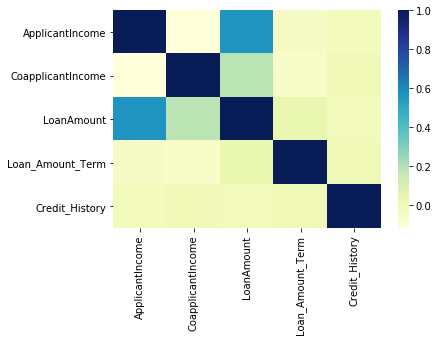

In [7]:
print("Correlation graph of dataset")
correlation=trainingDataset.corr()
sns.heatmap(correlation,  cmap="YlGnBu")
plt.show()

In [8]:
print("Checking for null value")
trainingDataset.isnull().sum()

Checking for null value


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
print("Fixing null values for both the datasets")
def fillNa(dataset):
    dataset['Gender'].fillna("Male",inplace=True)
    dataset['Married'].fillna("yes",inplace=True)
    dataset['Dependents'].fillna(0,inplace=True)
    dataset['Self_Employed'].fillna('no',inplace=True)
    dataset['LoanAmount'].fillna(0,inplace=True)
    dataset['Loan_Amount_Term'].fillna(0,inplace=True)
    dataset['Credit_History'].fillna(0,inplace=True)
    return dataset

trainingDataset = fillNa(trainingDataset)
testingDataset = fillNa(testingDataset)

display(trainingDataset.isnull().sum())

Fixing null values for both the datasets


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

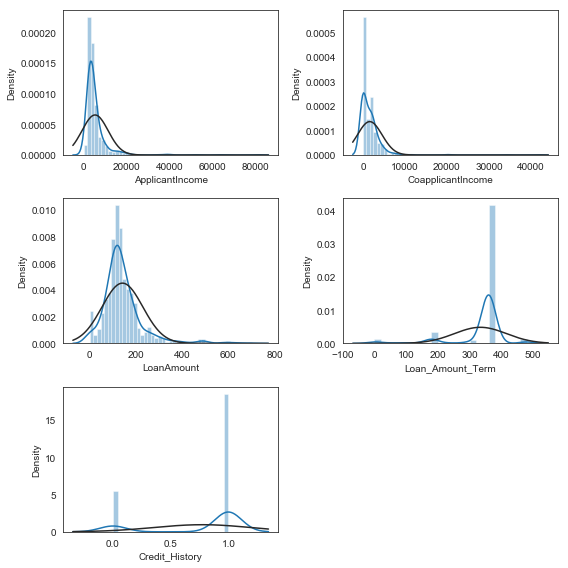

In [10]:
# univariant analysis
plt.figure(figsize=(8,8))
for i, col in enumerate(trainingDataset.dtypes[trainingDataset.dtypes != 'object'].index):
    sns.set_style('white')
    i += 1
    plt.subplot(int(str(32)+str(i)))
    sns.distplot(trainingDataset[col], fit = norm)
plt.tight_layout()
plt.show()

In [11]:
def chi_sq(col, df):
    for i in df.dtypes[df.dtypes == 'object'].index:
        if i != col:
            chisqResult = chi2_contingency(pd.crosstab(index = df[i], columns = df[col]))
            print(f"p - value between {col} and {i} is:", round(chisqResult[1],3))
            if chisqResult[1] > 0.05:
                print(f"{col} and {i} are not correlated")
            print()

In [12]:
print("performing chi-square test between loan status and other attributes")
chi_sq('LoanAmount', trainingDataset)

performing chi-square test between loan status and other attributes
p - value between LoanAmount and Loan_ID is: 0.342
LoanAmount and Loan_ID are not correlated

p - value between LoanAmount and Gender is: 0.49
LoanAmount and Gender are not correlated

p - value between LoanAmount and Married is: 1.0
LoanAmount and Married are not correlated

p - value between LoanAmount and Dependents is: 0.85
LoanAmount and Dependents are not correlated

p - value between LoanAmount and Education is: 0.935
LoanAmount and Education are not correlated

p - value between LoanAmount and Self_Employed is: 0.619
LoanAmount and Self_Employed are not correlated

p - value between LoanAmount and Property_Area is: 0.278
LoanAmount and Property_Area are not correlated

p - value between LoanAmount and Loan_Status is: 0.437
LoanAmount and Loan_Status are not correlated



In [13]:
print("Drop unnecessary columns")
cols = ['Loan_Amount_Term', 'Loan_ID']
trainingDataset.drop(columns = cols , axis = 1, inplace=True)
testingDataset.drop(columns = cols , axis = 1, inplace=True)

Drop unnecessary columns


In [14]:
print("Bi-variant analysis")
def cross_tab(col, df):
    for i in df.dtypes[df.dtypes == 'object'].index:
        if i != col:
            print(pd.crosstab(index = df[i], columns = df[col], normalize='index'))
            print()
cross_tab('Loan_Status', trainingDataset)

Bi-variant analysis
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080
yes          0.000000  1.000000

Loan_Status         N         Y
Dependents                     
0            0.400000  0.600000
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927
no             0.281250  0.718750

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  

In [15]:
testingDataset['Dependents'].replace('3+','0',inplace=True)
trainingDataset['Dependents'].replace('3+','0',inplace=True)

In [16]:
trainingDataset['Dependents'] = trainingDataset['Dependents'].apply(lambda x : str(x))
testingDataset['Dependents'] = testingDataset['Dependents'].apply(lambda x : str(x))

In [17]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    trainingDataset[col] = le.fit_transform(trainingDataset[col])
    if col in testingDataset:
        testingDataset[col] = le.transform(testingDataset[col])

In [18]:
print("Segregating inputs and outputs")

Y = trainingDataset['LoanAmount']
X = trainingDataset.drop(labels=['LoanAmount'],axis=1)

Segregating inputs and outputs


In [19]:
print("Sample from input and output")
display(X.head())

Sample from input and output


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,1.0,2,1


In [20]:
display(Y.head())

0      0.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [33]:
x_train, y_train = X.iloc[:450, :], Y.iloc[:450]
x_test, y_test = X.iloc[450:, :], Y.iloc[450:]

In [34]:
print("creating KNN model and training the model with the training dataset")

K = 3
euclidean = lambda x,y: sqrt(sum((x-y)**2))
predicted_labels = []
for data in x_test.values:
    distances = list(map(euclidean, repeat(data), x_train.values))
    distanceValue = [y for x,y in sorted(enumerate(distances), key = lambda x: x[1])]
    distanceIndex = [x for x,y in sorted(enumerate(distances), key = lambda x: x[1])]
    distances.sort()
    temp = {}
    for idx, dist in zip(distanceIndex[:K], distances[:K]):
        label = y_train[idx]
        if temp.get(label):
            temp[label] = temp[label] + (1 / dist)
        else:
            try:
                temp[label] = (1 / dist)
            except:
                temp[label] = 0
    predicted_labels.append(np.mean(distanceValue[:K]))

creating KNN model and training the model with the training dataset


In [35]:
MSE = np.square(np.subtract(y_test,predicted_labels)).mean() 
 
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)

Root Mean Square Error:
 2370.053331810325


In [24]:
print("Predicting loan amount for the test dataset")
K = 2
euclidean = lambda x,y: sqrt(sum((x-y)**2))
predicted_labels = []
for data in testingDataset.values:
    distances = list(map(euclidean, repeat(data), X.values))
    distanceValue = [y for x,y in sorted(enumerate(distances), key = lambda x: x[1])]
    distanceIndex = [x for x,y in sorted(enumerate(distances), key = lambda x: x[1])]
    distances.sort()
    temp = {}
    for idx, dist in zip(distanceIndex[:K], distances[:K]):
        label = Y[idx]
        if temp.get(label):
            temp[label] = temp[label] + (1 / dist)
        else:
            try:
                temp[label] = (1 / dist)
            except:
                temp[label] = 0
    predicted_labels.append(np.mean(distanceValue[:K]))

Predicting loan amount for the test dataset


In [25]:
print("Predicting loan amount for the test dataset")
testingDataset['LoanAmount'] = predicted_labels
display(testingDataset)

Predicting loan amount for the test dataset


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.331319,1.0,2
1,1,1,1,0,0,3076,1500,148.511005,1.0,2
2,1,1,2,0,0,5000,1800,345.601193,1.0,2
3,1,1,2,0,0,2340,2546,123.319031,0.0,2
4,1,0,0,1,0,3276,0,80.707071,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,1,1,4009,1777,131.427385,1.0,2
363,1,1,0,0,0,4158,709,246.517710,1.0,2
364,1,0,0,0,0,3250,1993,134.689900,0.0,1
365,1,1,0,0,0,5000,2393,258.508730,1.0,0
